In [1]:
import numpy as np

In [2]:
import os

filelist =[]

import pandas as pd
for subdir, dirs, files in os.walk('/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets'):
    for filename in files:
        filepath = subdir + os.sep + filename
        filelist.append(filepath)
        

In [80]:
print(filelist[1])

from scipy.ndimage import gaussian_filter1d

/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi5.xlsx


In [97]:
data ={}
tid = 0
list_x = []
list_y = []
dataset = {}
for i in range(100):
    tid = np.random.randint(1,8)
    print(filelist[tid])
    df = pd.read_excel(filelist[tid], engine='openpyxl')
    df = df.replace(to_replace='None', value=np.nan).dropna()
    df = df.replace(to_replace=' None', value=np.nan).dropna()
    df = np.array(df)
    x_temp = gaussian_filter1d(df[:,1].astype(np.float32).reshape([-1,1]),50)
    y_next = gaussian_filter1d(df[:,2].astype(np.float32).reshape([-1,1]),50)
    pjs = x_temp+np.random.normal(0,0.0000001,size = x_temp.shape)
    dataset['task'+str(i)] = (pjs, y_next)        

/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi3.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi2.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi2.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi5.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi2.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi5.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi5.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi2.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi3.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_1/pi5.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi4.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi4.xlsx
/gpfs/jlse-fs0/users/kraghavan/Data_WInd/Datasets/Data_Experiment_2/pi3.xlsx

In [98]:
print(x_temp.shape[1])

1


In [99]:
import pickle
with open('/gpfs/jlse-fs0/users/kraghavan/Continual/Wind.p', 'wb') as fp:
    pickle.dump(dataset, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
print(data.keys())

dict_keys(['task1', 'task2', 'task3', 'task4', 'task5', 'task6', 'task7', 'task8'])


In [6]:
print(df.head())

                                Device  Humidity  Temperature  Experiment  \
0   'gnfuv-temp-exp1-55d487b85b-5dmwq'        26           30           1   
1   'gnfuv-temp-exp1-55d487b85b-5dmwq'        25           30           1   
2   'gnfuv-temp-exp1-55d487b85b-5dmwq'        25           30           1   
3   'gnfuv-temp-exp1-55d487b85b-5dmwq'        25           30           1   
4   'gnfuv-temp-exp1-55d487b85b-5dmwq'        25           30           1   

                            time   Pi  
0  2018-07-20 11:59:44.533826000  pi5  
1  2018-07-20 11:59:51.217489000  pi5  
2  2018-07-20 11:59:57.856444000  pi5  
3  2018-07-20 12:00:04.496282000  pi5  
4  2018-07-20 12:00:11.136256000  pi5  


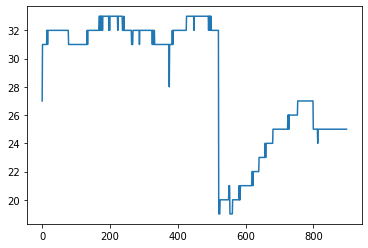

In [20]:
import matplotlib.pyplot as plt
plt.plot(df['Temperature'])

In [18]:
df['Humidity'].shape

(899,)

In [19]:
df['Temperature'].shape

(899,)

In [32]:
H = df['Humidity'].values.reshape([-1,1])

In [33]:
print(H.shape)

(899, 1)
